In [124]:
# Datos
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# `cleaned_reviews.csv`

## Análisis Exploratorio

### Carga de datos

In [125]:
df_cleaned_reviews = pd.read_csv('dataset/cleaned_reviews.csv')

### Revisión de datos

Comprueba la estructura de los datos, como la cantidad de filas y columnas, los tipos de datos de cada columna, y si hay datos faltantes o valores atípicos.

In [126]:
df_cleaned_reviews.head()

,Unnamed: 0,reviews,rates,date,country,verified,comments
0,0,✅ Trip Verified | Excellent service both on th...,5,2023-01-24,United Kingdom,True,excellent service ground board first class pro...
1,1,✅ Trip Verified | Good lounge at Cape Town. O...,9,2023-01-24,United Kingdom,True,good lounge cape town time departure drink hig...
2,2,✅ Trip Verified | A really excellent journey....,9,2023-01-23,United Kingdom,True,really excellent journey lounge overcrowded la...
3,3,✅ Trip Verified | This flight was one of the ...,9,2023-01-21,United Kingdom,True,flight one worst ever life wanted pamper bough...
4,4,Not Verified | It seems that there is a race t...,2,2023-01-19,United States,False,verified seems race bottom amongst airline can...


In [127]:
# Cantidad de filas y columnas
print(df_cleaned_reviews.shape)

(3411, 7)


In [128]:
df_cleaned_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3411 entries, 0 to 3410
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3411 non-null   int64 
 1   reviews     3411 non-null   object
 2   rates       3411 non-null   int64 
 3   date        3411 non-null   object
 4   country     3411 non-null   object
 5   verified    3411 non-null   bool  
 6   comments    3411 non-null   object
dtypes: bool(1), int64(2), object(4)
memory usage: 163.3+ KB


valores nulos

In [129]:
df_cleaned_reviews.isnull().sum()

Unnamed: 0    0
reviews       0
rates         0
date          0
country       0
verified      0
comments      0
dtype: int64

Evaluamos que features son categoricas

In [130]:
df_cleaned_reviews["country"].value_counts()

country
United Kingdom           2165
United States             361
Australia                 147
Canada                    104
Germany                    60
                         ... 
Iceland                     1
Saint Kitts and Nevis       1
Costa Rica                  1
Cayman Islands              1
Oman                        1
Name: count, Length: 69, dtype: int64

In [131]:
df_cleaned_reviews["verified"].value_counts()

verified
False    2435
True      976
Name: count, dtype: int64

In [132]:
df_cleaned_reviews["verified"].value_counts()

verified
False    2435
True      976
Name: count, dtype: int64

### Limpieza de datos

Limpia los datos tratando con valores faltantes, valores atípicos, duplicados, y cualquier otro problema que pueda afectar la calidad de los datos y los análisis posteriores.

In [133]:
# Eliminamos la columna "Unnamed: 0"
df_cleaned_reviews = df_cleaned_reviews.drop(columns=['Unnamed: 0'])

# Convertir la columna "date" a tipo datetime
df_cleaned_reviews['date'] = pd.to_datetime(df_cleaned_reviews['date'])

# Eliminar filas duplicados.
df_cleaned_reviews.drop_duplicates(inplace=True)

# La columna "country" es una variable categórica, por lo que la convertimos a tipo "category"
df_cleaned_reviews['country'] = df_cleaned_reviews['country'].astype('category')

### Resumen estadístico

Calcula estadísticas descriptivas como la media, la mediana, la desviación estándar, los percentiles, etc., para comprender mejor la distribución y la variabilidad de los datos.

In [134]:
df_cleaned_reviews.describe()

,rates,date
count,3410.000000,3410
mean,4.819941,2017-05-18 07:24:14.780058624
min,1.000000,2014-05-18 00:00:00
25%,2.000000,2015-08-15 00:00:00
50%,4.000000,2016-12-08 12:00:00
75%,8.000000,2018-09-15 18:00:00
max,10.000000,2023-01-24 00:00:00
std,3.145510,NaN


## Graficos

### Cantidad de comentarios por país

Nota: cant_coment_pais para selecionar una columna hacer
- cant_coment_pais[False] -> sin comillas dado que es un booleano
- cant_coment_pais.iloc[:, 0]

In [135]:
cant_coment_pais = df_cleaned_reviews.groupby(["rates", "verified"])["reviews"].count().unstack()

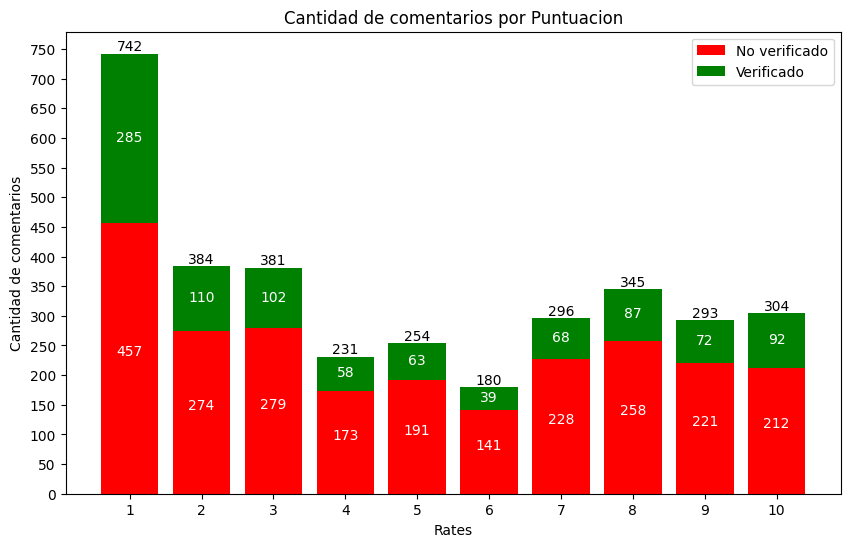

In [136]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(cant_coment_pais.index, cant_coment_pais[False], label='No verificado', color='red')
ax.bar(cant_coment_pais.index, cant_coment_pais[True], bottom=cant_coment_pais[False], label='Verificado', color='green')

for i, rate in enumerate(cant_coment_pais.index):
    total = cant_coment_pais.loc[rate].sum()
    ax.text(rate, total, f'{total}', ha='center', va='bottom')
    #print(i, rate, total)

    total_false = cant_coment_pais.loc[rate][False]
    ax.text(rate, total_false/2, f'{total_false}', ha='center', va='bottom', color='white')

    total_true = cant_coment_pais.loc[rate][True]
    ax.text(rate, total_false + total_true/2-10, f'{total_true}', ha='center', va='bottom', color='white')
    
ax.set_xticks(cant_coment_pais.index)
ax.set_yticks(range(0, 751, 50))

ax.set_xlabel('Rates')
ax.set_ylabel('Cantidad de comentarios')
ax.set_title('Cantidad de comentarios por Puntuacion')
ax.legend()

plt.show()

### Distribución de las calificaciones a lo largo del tiempo

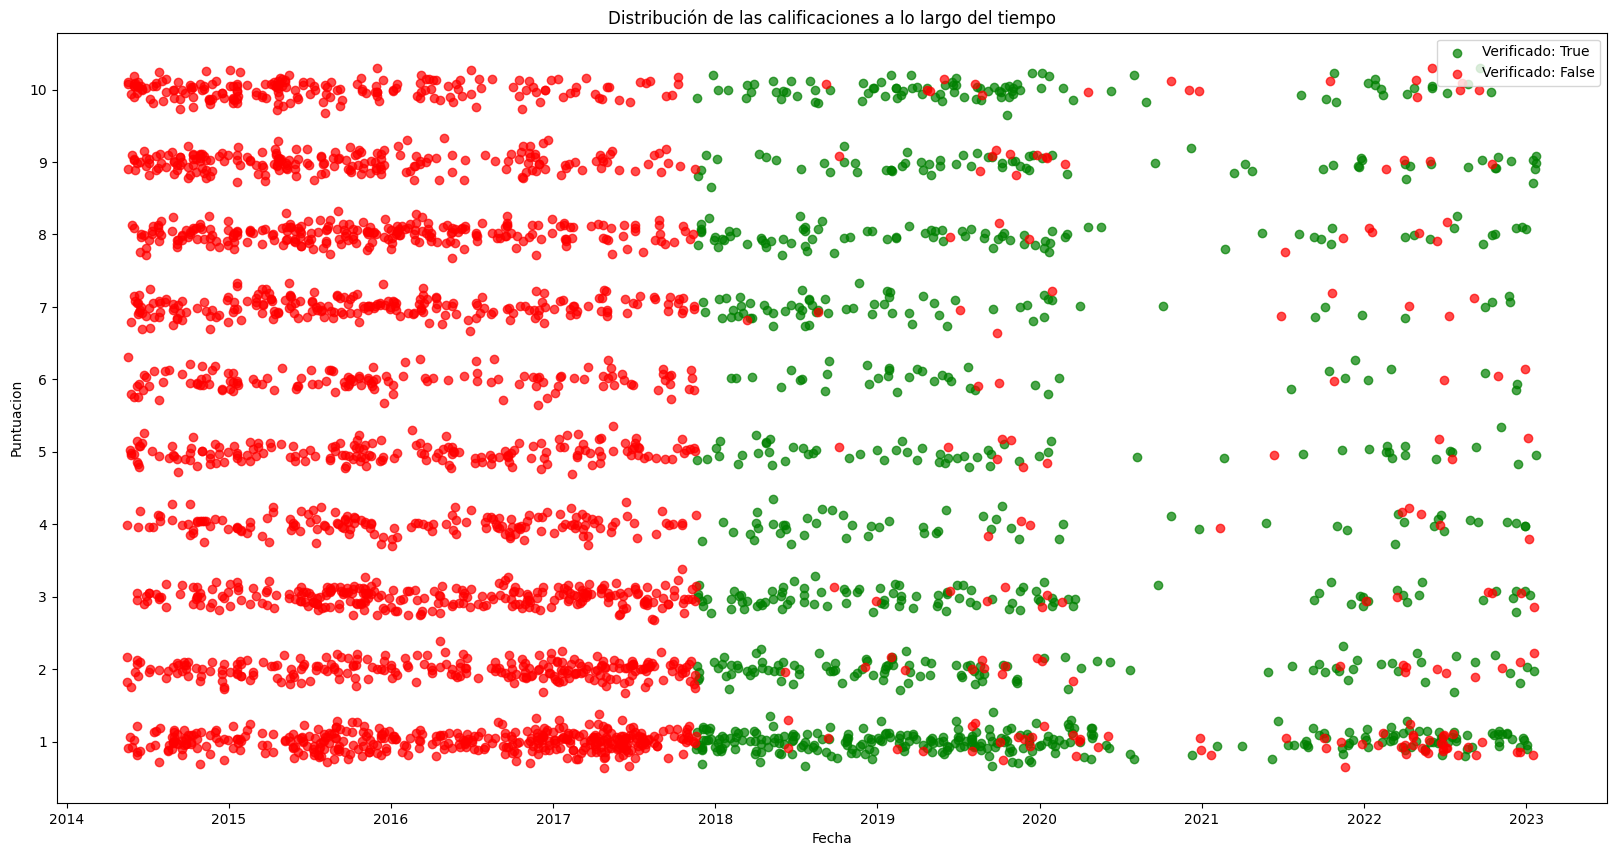

In [137]:
fig, ax = plt.subplots(figsize=(20, 10))

# Añadimos un poco de "ruido" a los datos de 'rates' para evitar la superposición de puntos
y_jittered = df_cleaned_reviews['rates'] + np.random.normal(0, 0.12, df_cleaned_reviews.shape[0])

# Creamos un diccionario de colores para la variable 'verified'
colors = {True: 'green', False: 'red'}  # Cambia los colores según tus preferencias

# Creamos el gráfico de dispersión con Matplotlib
for label, color in colors.items():
    ax.scatter(df_cleaned_reviews[df_cleaned_reviews['verified'] == label]['date'], 
               y_jittered[df_cleaned_reviews['verified'] == label], 
               c=color, label=f'Verificado: {label}', alpha=0.7)

ax.set_title('Distribución de las calificaciones a lo largo del tiempo')
ax.set_xlabel('Fecha')
ax.set_ylabel('Puntuacion')

ax.set_yticks(range(1, 11))

ax.legend(loc='upper right')

plt.show()

Del grafico anterior se puede observar que entre 2014 a 2018 las reviews no se verificaban y ademas se realizaban mas cantidad de veces. 

<Axes: xlabel='date', ylabel='rates'>

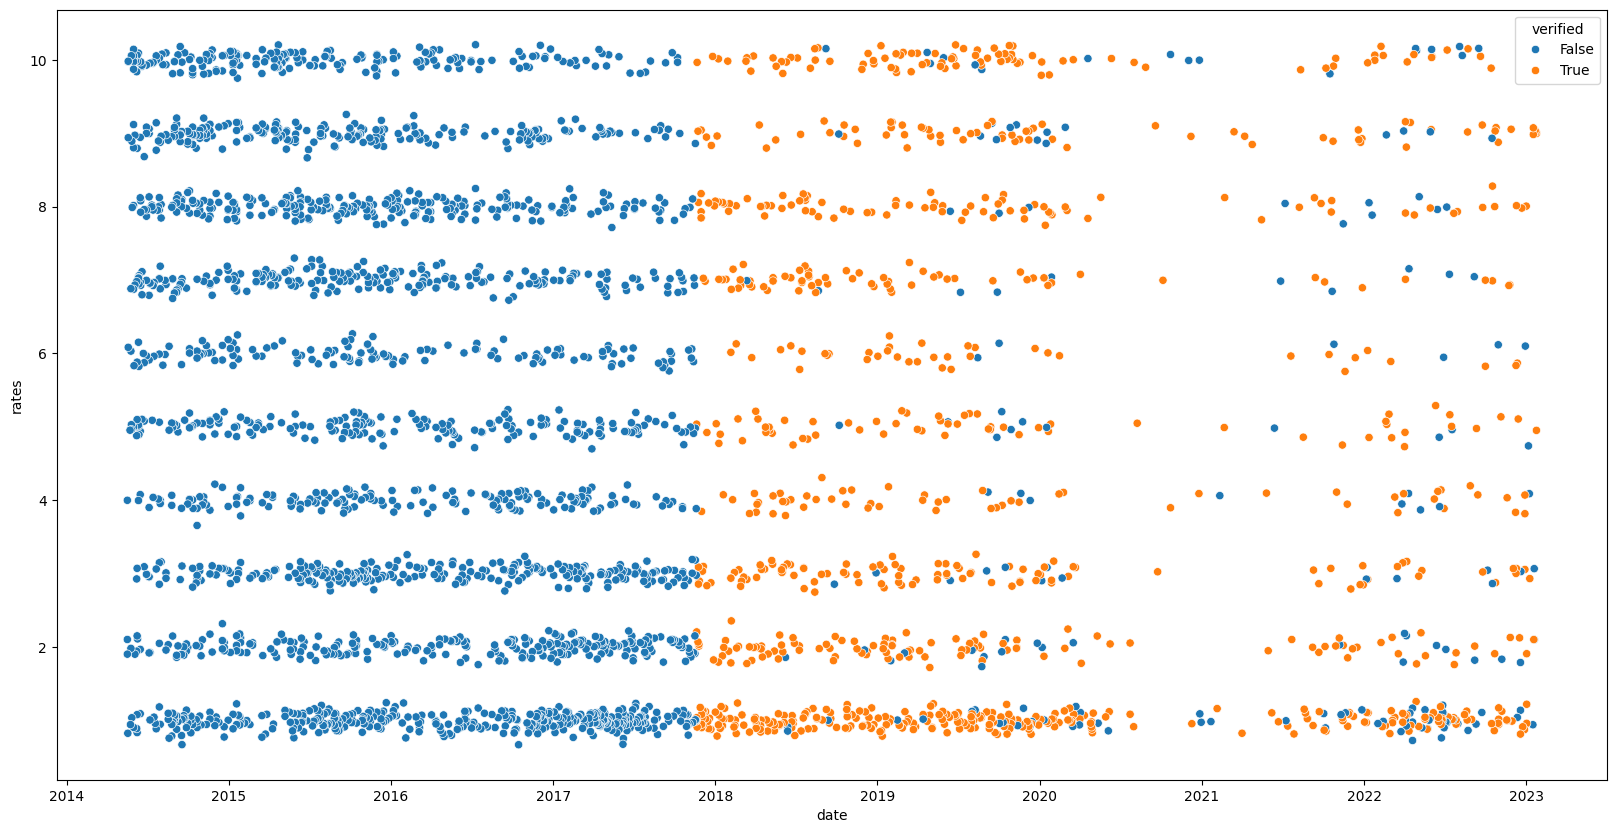

In [138]:
fig, ax = plt.subplots(figsize=(20, 10))

y_jittered = df_cleaned_reviews['rates'] + np.random.normal(0, 0.1, df_cleaned_reviews.shape[0])

sns.scatterplot(x=df_cleaned_reviews['date'], y=y_jittered, hue=df_cleaned_reviews['verified'], ax=ax)


Que performance tiene el promedio de calificaciones por mes

Text(0.5, 1.0, 'Promedio de rates por mes')

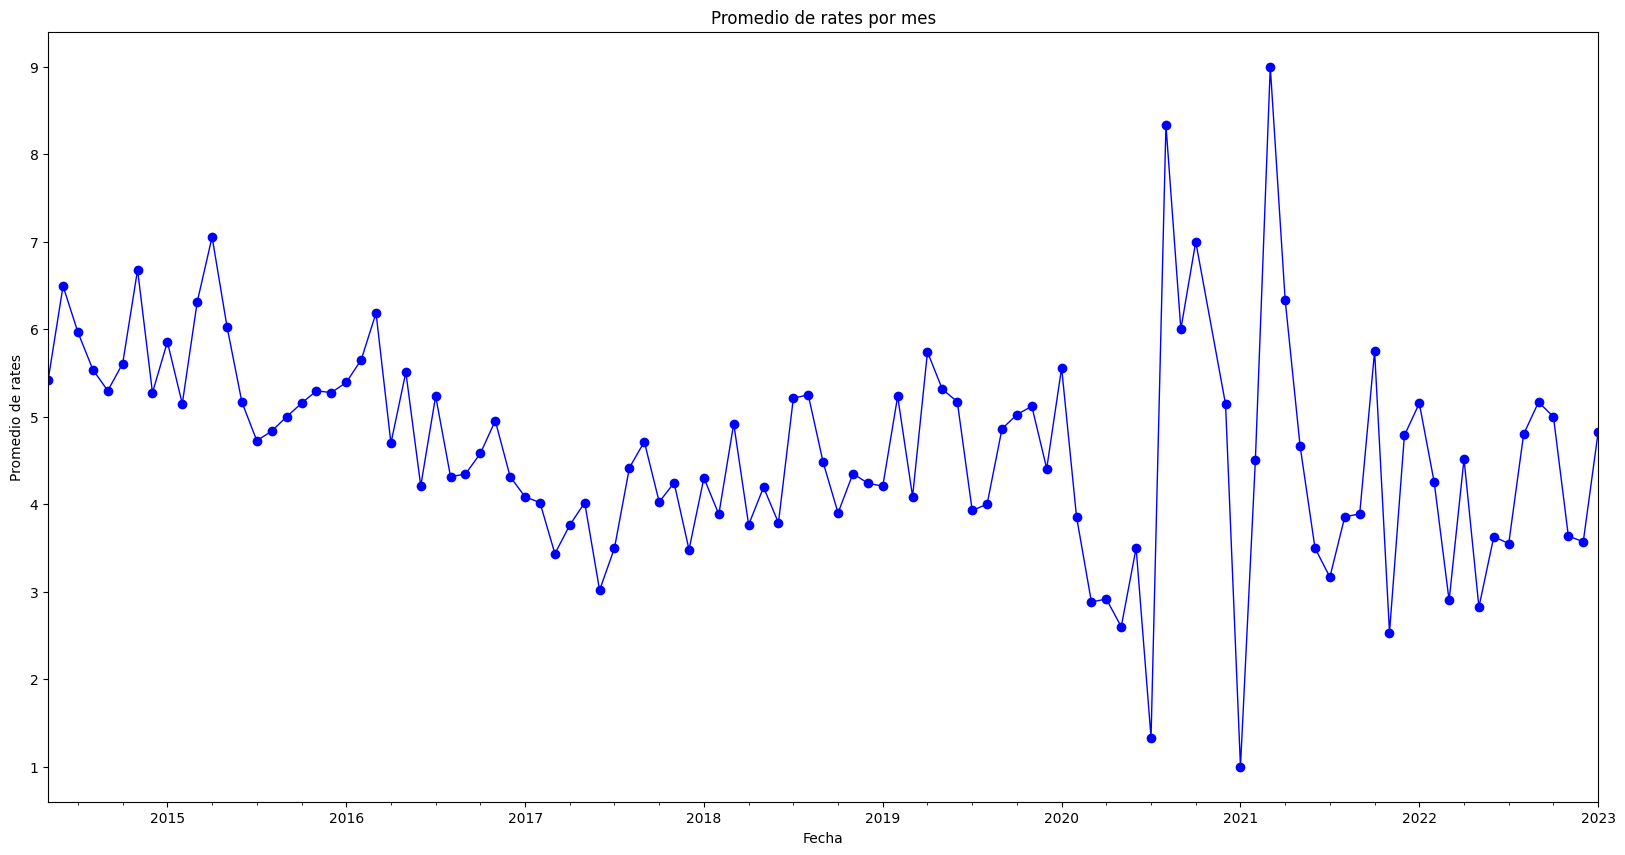

In [139]:
# las review mejoraron a lo largo del tiempo
fig, ax = plt.subplots(figsize=(20, 10))

# usamos el promedio de rates por mes
df_cleaned_reviews['month'] = df_cleaned_reviews['date'].dt.to_period('M')
average_rates_per_month = df_cleaned_reviews.groupby('month')['rates'].mean()

average_rates_per_month.plot(ax=ax, color='blue', marker='o', linestyle='-', linewidth=1, markersize=6)

ax.set_xlabel('Fecha')
ax.set_ylabel('Promedio de rates')
ax.set_title('Promedio de rates por mes')

# `filtered_customer_booking.csv`

## Análisis Exploratorio

### Carga de datos

In [140]:
df_filtered = pd.read_csv('dataset/filtered_customer_booking.csv')

### Revisión de datos

In [141]:
df_filtered.head()

,Unnamed: 0,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [142]:
df_filtered.shape

(49982, 15)

In [143]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49982 entries, 0 to 49981
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             49982 non-null  int64  
 1   num_passengers         49982 non-null  int64  
 2   sales_channel          49982 non-null  object 
 3   trip_type              49982 non-null  object 
 4   purchase_lead          49982 non-null  int64  
 5   length_of_stay         49982 non-null  int64  
 6   flight_hour            49982 non-null  int64  
 7   flight_day             49982 non-null  int64  
 8   route                  49982 non-null  object 
 9   booking_origin         49982 non-null  object 
 10  wants_extra_baggage    49982 non-null  int64  
 11  wants_preferred_seat   49982 non-null  int64  
 12  wants_in_flight_meals  49982 non-null  int64  
 13  flight_duration        49982 non-null  float64
 14  booking_complete       49982 non-null  int64  
dtypes:

valores nulos

In [144]:
df_filtered.isnull().sum()

Unnamed: 0               0
num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

Posibles columnas categoricas

In [145]:
df_filtered["sales_channel"].value_counts()

sales_channel
Internet    44366
Mobile       5616
Name: count, dtype: int64

In [146]:
df_filtered["trip_type"].value_counts()

trip_type
RoundTrip     49479
OneWay          387
CircleTrip      116
Name: count, dtype: int64

In [147]:
df_filtered["route"].value_counts()

route
AKLKUL    2678
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
LBUTPE       1
CXRMEL       1
DELKBR       1
KOSSYD       1
MRUXIY       1
Name: count, Length: 799, dtype: int64

In [148]:
df_filtered["booking_origin"].value_counts()

booking_origin
Australia               17865
Malaysia                 7173
South Korea              4559
Japan                    3884
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: count, Length: 104, dtype: int64

### Resumen estadistico

In [149]:
df_filtered.describe()

,Unnamed: 0,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,49982.000000,49982.000000,49982.000000,49982.000000,49982.000000,49982.000000,49982.000000,49982.000000,49982.000000,49982.000000,49982.000000
mean,24999.957905,1.591133,84.754652,23.046757,9.065344,3.814253,0.668881,0.297047,0.427174,7.277333,0.149574
std,14433.587942,1.020217,89.923276,33.892624,5.412551,1.992722,0.470621,0.456962,0.494673,1.496829,0.356657
min,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,12500.250000,1.000000,21.000000,5.000000,5.000000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,25000.500000,1.000000,51.000000,17.000000,9.000000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,37498.750000,2.000000,115.000000,28.000000,13.000000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,49999.000000,9.000000,495.000000,778.000000,23.000000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


### limpiza de datos

In [150]:
# Eliminamos la columna "Unnamed: 0"
df_filtered = df_filtered.drop(columns=['Unnamed: 0'])

df_filtered['sales_channel'] = df_filtered['sales_channel'].astype('category')
df_filtered['trip_type'] = df_filtered['trip_type'].astype('category')
df_filtered['route'] = df_filtered['route'].astype('category')
df_filtered['booking_origin'] = df_filtered['booking_origin'].astype('category')

## Graficos

In [151]:
df_filtered

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0
49978,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0
49979,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0
49980,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0


Text(0.5, 1.0, 'Distribución de la variable "purchase_lead"')

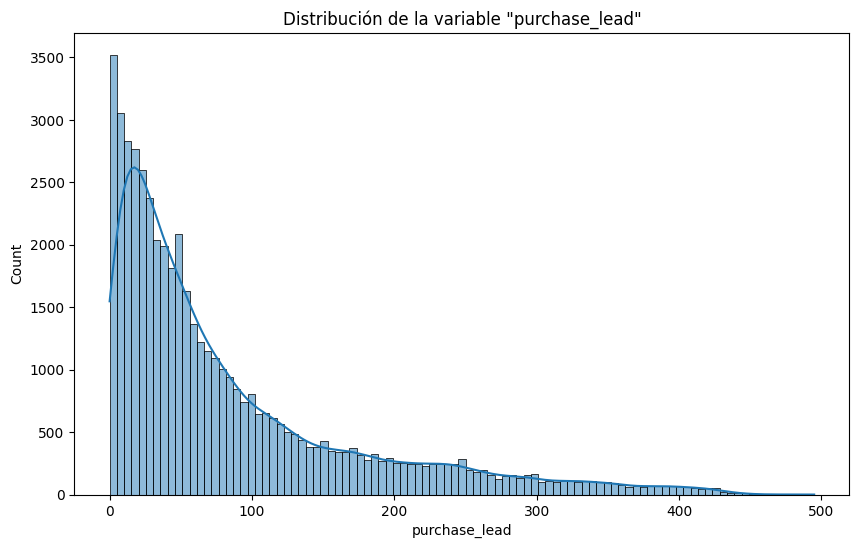

In [152]:
# Graficams la distribución 	purchase_lead
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered.purchase_lead, kde=True)
plt.title('Distribución de la variable "purchase_lead"')

In [153]:
df_filtered.groupby(["num_passengers", "sales_channel"])["purchase_lead"].count().unstack()

C:\Users\lufer\AppData\Local\Temp\ipykernel_9312\109514769.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_filtered.groupby(["num_passengers", "sales_channel"])["purchase_lead"].count().unstack()


sales_channel,Internet,Mobile
num_passengers,,
1,27790,3556
2,11417,1378
3,2554,385
4,1616,167
5,495,66
6,254,35
7,101,13
8,77,12
9,62,4


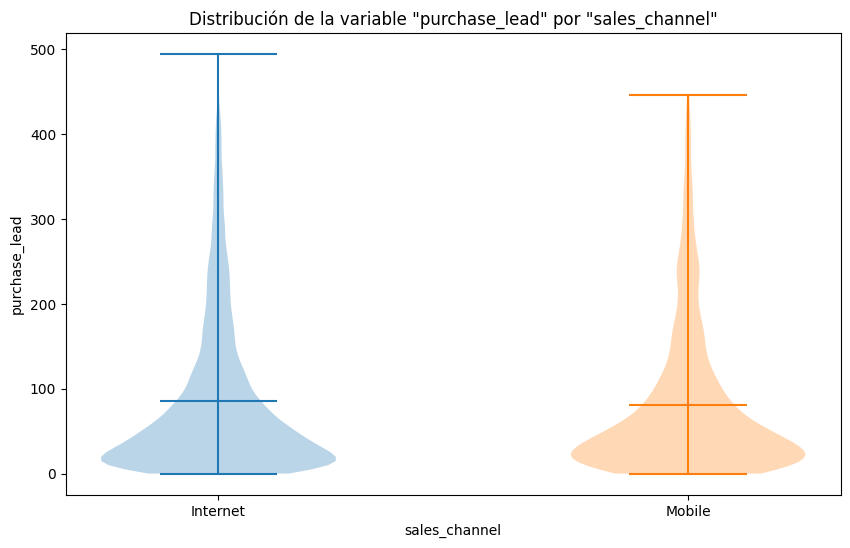

In [154]:
fig, ax = plt.subplots(figsize=(10, 6))

# Obtenemos los valores únicos de 'sales_channel'
channels = df_filtered['sales_channel'].unique()

# Creamos un gráfico de violín para cada valor único de 'sales_channel'
for i, channel in enumerate(channels):
    data = df_filtered[df_filtered['sales_channel'] == channel]
    ax.violinplot(data['purchase_lead'], positions=[i], showmeans=True)

# Configuramos las etiquetas del eje x con los valores únicos de 'sales_channel'
ax.set_xticks(np.arange(len(channels)))
ax.set_xticklabels(channels)

ax.set_xlabel('sales_channel')
ax.set_ylabel('purchase_lead')
plt.title('Distribución de la variable "purchase_lead" por "sales_channel"')
plt.show()

C:\Users\lufer\AppData\Local\Temp\ipykernel_9312\2638087352.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count = df_filtered.groupby(["num_passengers", "sales_channel"])["purchase_lead"]


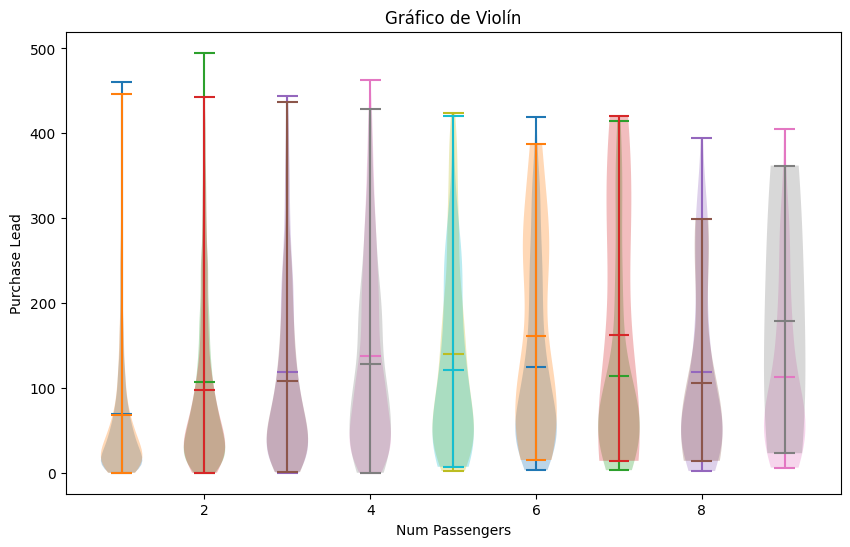

In [155]:
count = df_filtered.groupby(["num_passengers", "sales_channel"])["purchase_lead"]

# Creamos una figura y ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Iteramos sobre los grupos generados por groupby
for key, group in count:
    # Creamos un gráfico de violín para cada grupo
    ax.violinplot(group, positions=[key[0]], showmeans=True)  # Utilizamos solo la primera parte de la clave (num_passengers) como posición

# Establecemos el título y las etiquetas de los ejes
ax.set_title('Gráfico de Violín')
ax.set_xlabel('Num Passengers')
ax.set_ylabel('Purchase Lead')

plt.show()

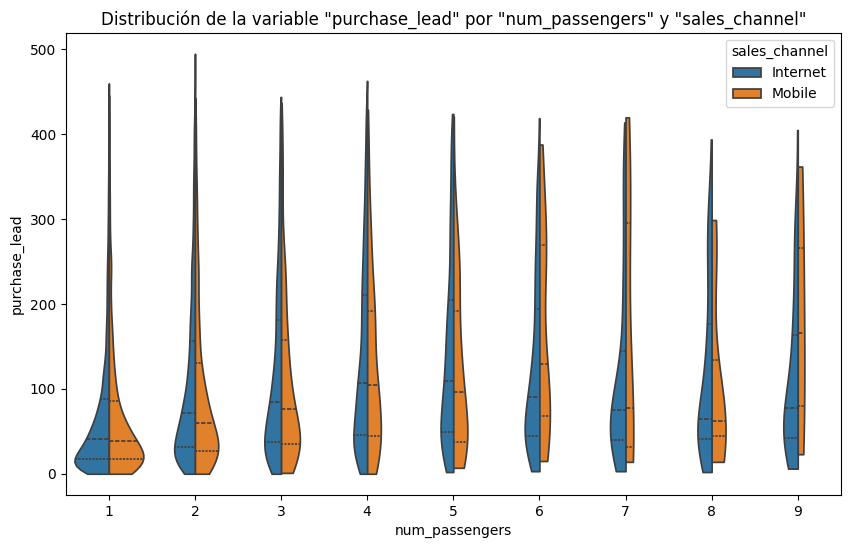

In [156]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(data=df_filtered, x="num_passengers", y="purchase_lead", hue="sales_channel", split=True, inner="quartile",cut=0)

ax.set_title('Distribución de la variable "purchase_lead" por "num_passengers" y "sales_channel"')

plt.show()


### Relacion entre num_passengers, Sales_channel y Lenght_of_stay

In [157]:
stay_stats_by_passengers_and_channel = df_filtered.groupby(["num_passengers", "sales_channel"])["length_of_stay"].describe()

stay_stats_by_passengers_and_channel

C:\Users\lufer\AppData\Local\Temp\ipykernel_9312\677062091.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stay_stats_by_passengers_and_channel = df_filtered.groupby(["num_passengers", "sales_channel"])["length_of_stay"].describe()


count       mean        std  min  25%   50%  \
num_passengers sales_channel                                                  
1              Internet       27790.0  26.878050  37.255884  0.0  5.0  19.0   
               Mobile          3556.0  19.636952  28.109502  1.0  5.0   6.0   
2              Internet       11417.0  20.169659  32.023230  0.0  5.0   6.0   
               Mobile          1378.0  14.500000  30.803150  1.0  4.0   6.0   
3              Internet        2554.0  16.538763  21.030434  0.0  5.0   6.0   
               Mobile           385.0  11.618182  13.214858  2.0  5.0   6.0   
4              Internet        1616.0  14.620668  16.005968  1.0  5.0   6.0   
               Mobile           167.0  11.023952  12.689030  3.0  5.0   6.0   
5              Internet         495.0  13.537374  12.837749  1.0  5.0   6.0   
               Mobile            66.0   7.424242   8.188285  4.0  4.0   5.0   
6              Internet         254.0  10.866142  24.825036  2.0  5.0   6.0   
               Mobile            35.0   9.828571  12.123108  2.0  4.5   5.0   
7              Internet         101.0   9.435644   9.941243  1.0  5.0   6.0   
               Mobile            13.0   7.615385   5.156524  4.0  5.0   6.0   
8              Internet          77.0  11.376623  17.839223  2.0  5.0   5.0   
               Mobile            12.0   6.500000   3.343923  5.0  5.0   6.0   
9              Internet          62.0   6.274194   5.044618  3.0  4.0   5.0   
               Mobile             4.0   6.000000   0.000000  6.0  6.0   6.0   

                               75%    max  
num_passengers sales_channel               
1              Internet       31.0  778.0  
               Mobile         26.0  513.0  
2              Internet       24.0  773.0  
               Mobile         17.0  369.0  
3              Internet       23.0  335.0  
               Mobile         17.0  107.0  
4              Internet       21.0  214.0  
               Mobile          6.0   91.0  
5              Internet       20.0   72.0  
               Mobile          6.0   43.0  
6              Internet        6.0  362.0  
               Mobile          6.0   65.0  
7              Internet        6.0   72.0  
               Mobile          6.0   21.0  
8              Internet        6.0   78.0  
               Mobile          6.0   17.0  
9              Internet        6.0   30.0  
               Mobile          6.0    6.0

En promedio las personas que viajan solas tienen una estadia mayor

In [158]:
# Desapilamos el DataFrame y seleccionamos la columna 'count'
counts_by_channel = stay_stats_by_passengers_and_channel.unstack()["count"]
counts_by_channel

sales_channel,Internet,Mobile
num_passengers,,
1,27790.0,3556.0
2,11417.0,1378.0
3,2554.0,385.0
4,1616.0,167.0
5,495.0,66.0
6,254.0,35.0
7,101.0,13.0
8,77.0,12.0
9,62.0,4.0


In [159]:
# Calculamos la proporción de reservas por Internet y Móvil
counts_by_channel["Internet_to_Mobile_ratio"] = counts_by_channel["Internet"] / counts_by_channel["Mobile"]

In [160]:
# Calculamos la media de la proporción
average_ratio = counts_by_channel["Internet_to_Mobile_ratio"].mean()
print(f'La proporción promedio de reservas por Internet a Móvil es de {average_ratio:.2f}')

La proporción promedio de reservas por Internet a Móvil es de 8.54


La proporcionalidad entre las personas que contratan el servicio atraves de internet o Mobile se mantiene constante en el lapso de tiempo entre 2014 a 2023.

### fe

(3807, 14)

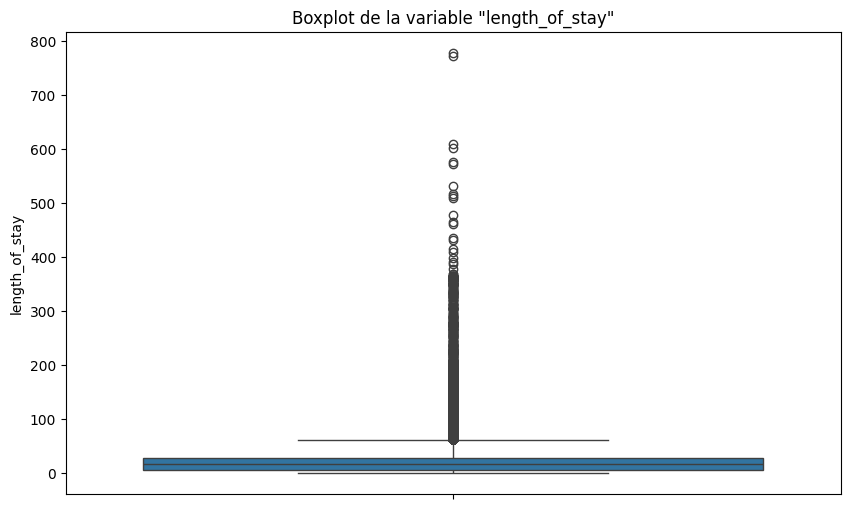

In [161]:
plt.figure(figsize=(10, 6))
sns.boxplot(df_filtered.length_of_stay)
plt.title('Boxplot de la variable "length_of_stay"')


# cuantos datos son outliers
Q1 = df_filtered.length_of_stay.quantile(0.25)
Q3 = df_filtered.length_of_stay.quantile(0.75)
IQR = Q3 - Q1

outliers = df_filtered[(df_filtered.length_of_stay < (Q1 - 1.5 * IQR)) | (df_filtered.length_of_stay > (Q3 + 1.5 * IQR))]

outliers.shape


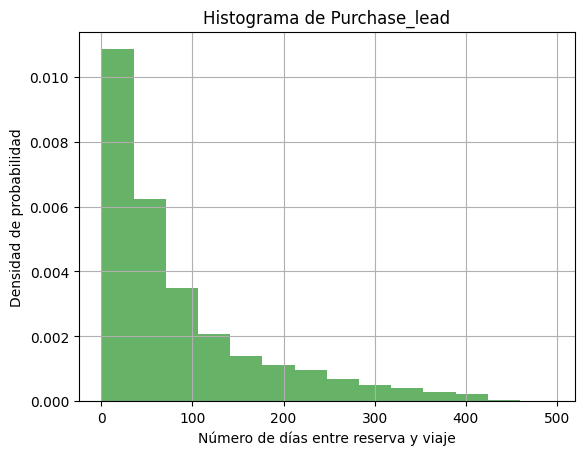

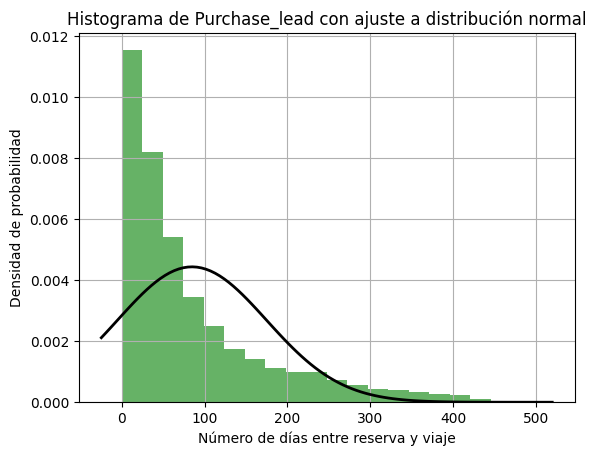

In [162]:
from scipy.stats import norm


# Visualizar la distribución con un histograma
plt.hist(df_filtered["purchase_lead"], bins=14, density=True, alpha=0.6, color='g')
plt.title('Histograma de Purchase_lead')
plt.xlabel('Número de días entre reserva y viaje')
plt.ylabel('Densidad de probabilidad')
plt.grid(True)
plt.show()

# Ajustar la distribución a una distribución normal
mu, std = norm.fit(df_filtered["purchase_lead"])

# Visualizar la distribución ajustada
plt.hist(df_filtered["purchase_lead"], bins=20, density=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Histograma de Purchase_lead con ajuste a distribución normal')
plt.xlabel('Número de días entre reserva y viaje')
plt.ylabel('Densidad de probabilidad')
plt.grid(True)
plt.show()

# Calcular la probabilidad de que Purchase_lead esté en un rango dado
#probabilidad = norm.cdf(x_max, mu, std) - norm.cdf(x_min, mu, std)
#print("La probabilidad de que Purchase_lead esté entre x_min y x_max es:", probabilidad)


C:\Users\lufer\AppData\Local\Temp\ipykernel_9312\3244125518.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_filtered.groupby(["sales_channel"])["purchase_lead"]
C:\Users\lufer\AppData\Local\Temp\ipykernel_9312\3244125518.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_filtered.groupby(["sales_channel"])["purchase_lead"].describe()


<Axes: xlabel='purchase_lead', ylabel='Count'>

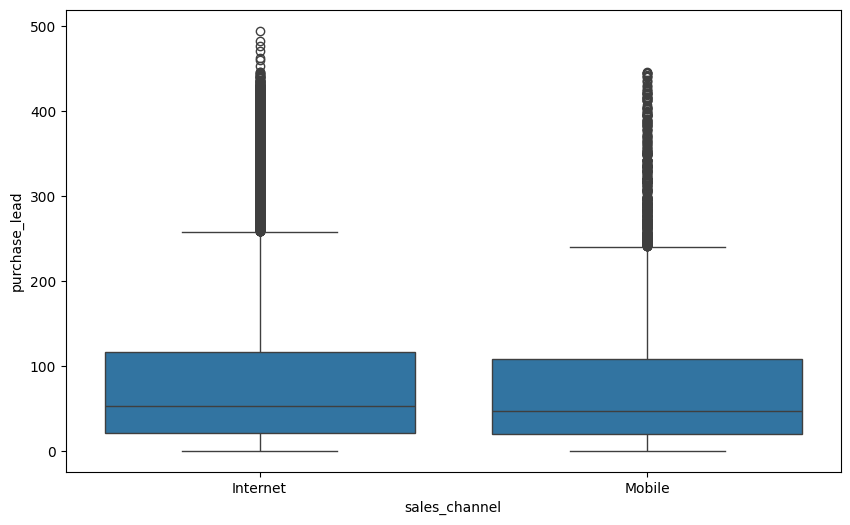

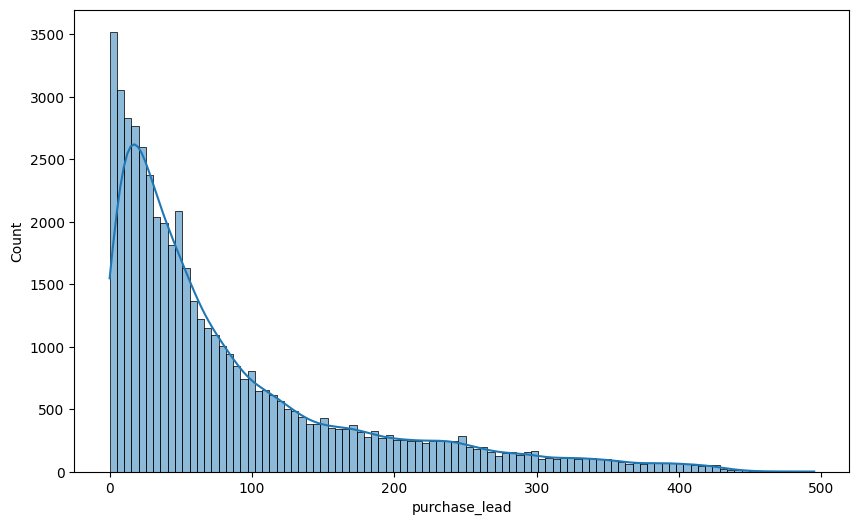

In [163]:
df_filtered.groupby(["sales_channel"])["purchase_lead"]

df_filtered.groupby(["sales_channel"])["purchase_lead"].describe()

# graficams
plt.figure(figsize=(10, 6))
sns.boxplot(x='sales_channel', y='purchase_lead', data=df_filtered)

# grafico 
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered.purchase_lead, kde=True)

          



<Axes: xlabel='purchase_lead', ylabel='length_of_stay'>

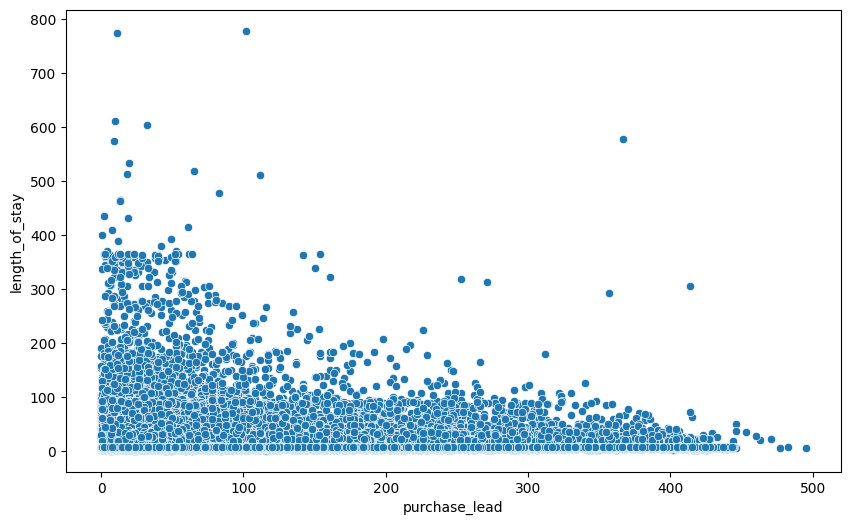

In [164]:
# grafic de scarter plot entre purchase_lead y length_of_stay
plt.figure(figsize=(10, 6))
sns.scatterplot(x='purchase_lead', y='length_of_stay', data=df_filtered)

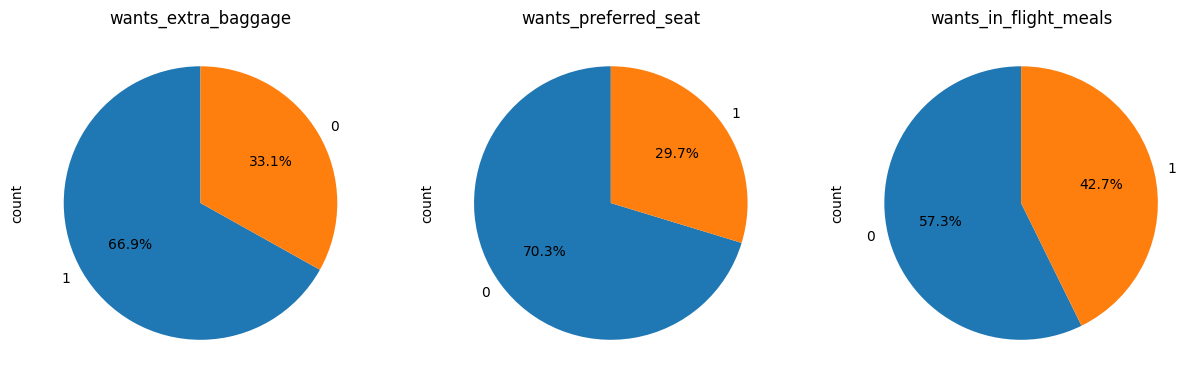

In [165]:
# grafico de  torta wants_extra_baggage, wants_preferred_seat, wants_in_flight_meals subplot
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

df_filtered['wants_extra_baggage'].value_counts().plot.pie(ax=ax[0], autopct='%1.1f%%', startangle=90)
ax[0].set_title('wants_extra_baggage')

df_filtered['wants_preferred_seat'].value_counts().plot.pie(ax=ax[1], autopct='%1.1f%%', startangle=90)
ax[1].set_title('wants_preferred_seat')

df_filtered['wants_in_flight_meals'].value_counts().plot.pie(ax=ax[2], autopct='%1.1f%%', startangle=90)
ax[2].set_title('wants_in_flight_meals')

plt.show()



In [166]:
columns = ["wants_extra_baggage", "wants_preferred_seat", "wants_in_flight_meals"]
df = df_filtered[columns].apply(pd.Series.value_counts)
df


,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals
0,16550,35135,28631
1,33432,14847,21351


In [167]:
df_grouped = df_filtered.groupby(["wants_extra_baggage", "wants_preferred_seat", "wants_in_flight_meals"])["length_of_stay"].mean().reset_index(name='mean')
df_grouped

,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,mean
0,0,0,0,14.717335
1,0,0,1,15.999122
2,0,1,0,11.713918
3,0,1,1,12.311562
4,1,0,0,25.133988
5,1,0,1,30.337858
6,1,1,0,21.322229
7,1,1,1,29.948119


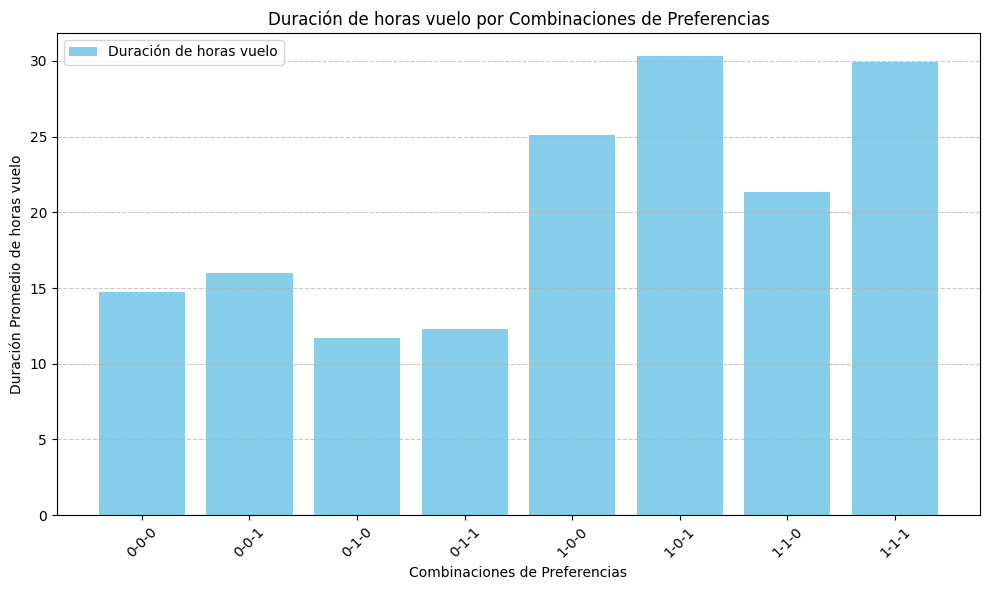

In [168]:
import matplotlib.pyplot as plt
df_grouped = df_filtered.groupby(["wants_extra_baggage", "wants_preferred_seat", "wants_in_flight_meals"])["length_of_stay"]
# Supongamos que df_grouped contiene los datos agrupados
# Puedes calcular la media, la suma u otra métrica según sea necesario
# Por ejemplo, aquí usaremos la media para la duración de la estadía
df_grouped_mean = df_grouped.mean().reset_index()

# Graficar
plt.figure(figsize=(10, 6))
plt.bar(df_grouped_mean.index, df_grouped_mean['length_of_stay'], color='skyblue')
plt.xlabel('Combinaciones de Preferencias')
plt.ylabel('Duración Promedio de horas vuelo')
plt.title('Duración de horas vuelo por Combinaciones de Preferencias')
plt.xticks(df_grouped_mean.index, labels=df_grouped_mean[['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals']].astype(str).agg('-'.join, axis=1), rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.legend(['Duración de horas vuelo'])
plt.show()


<Figure size 1000x600 with 0 Axes>

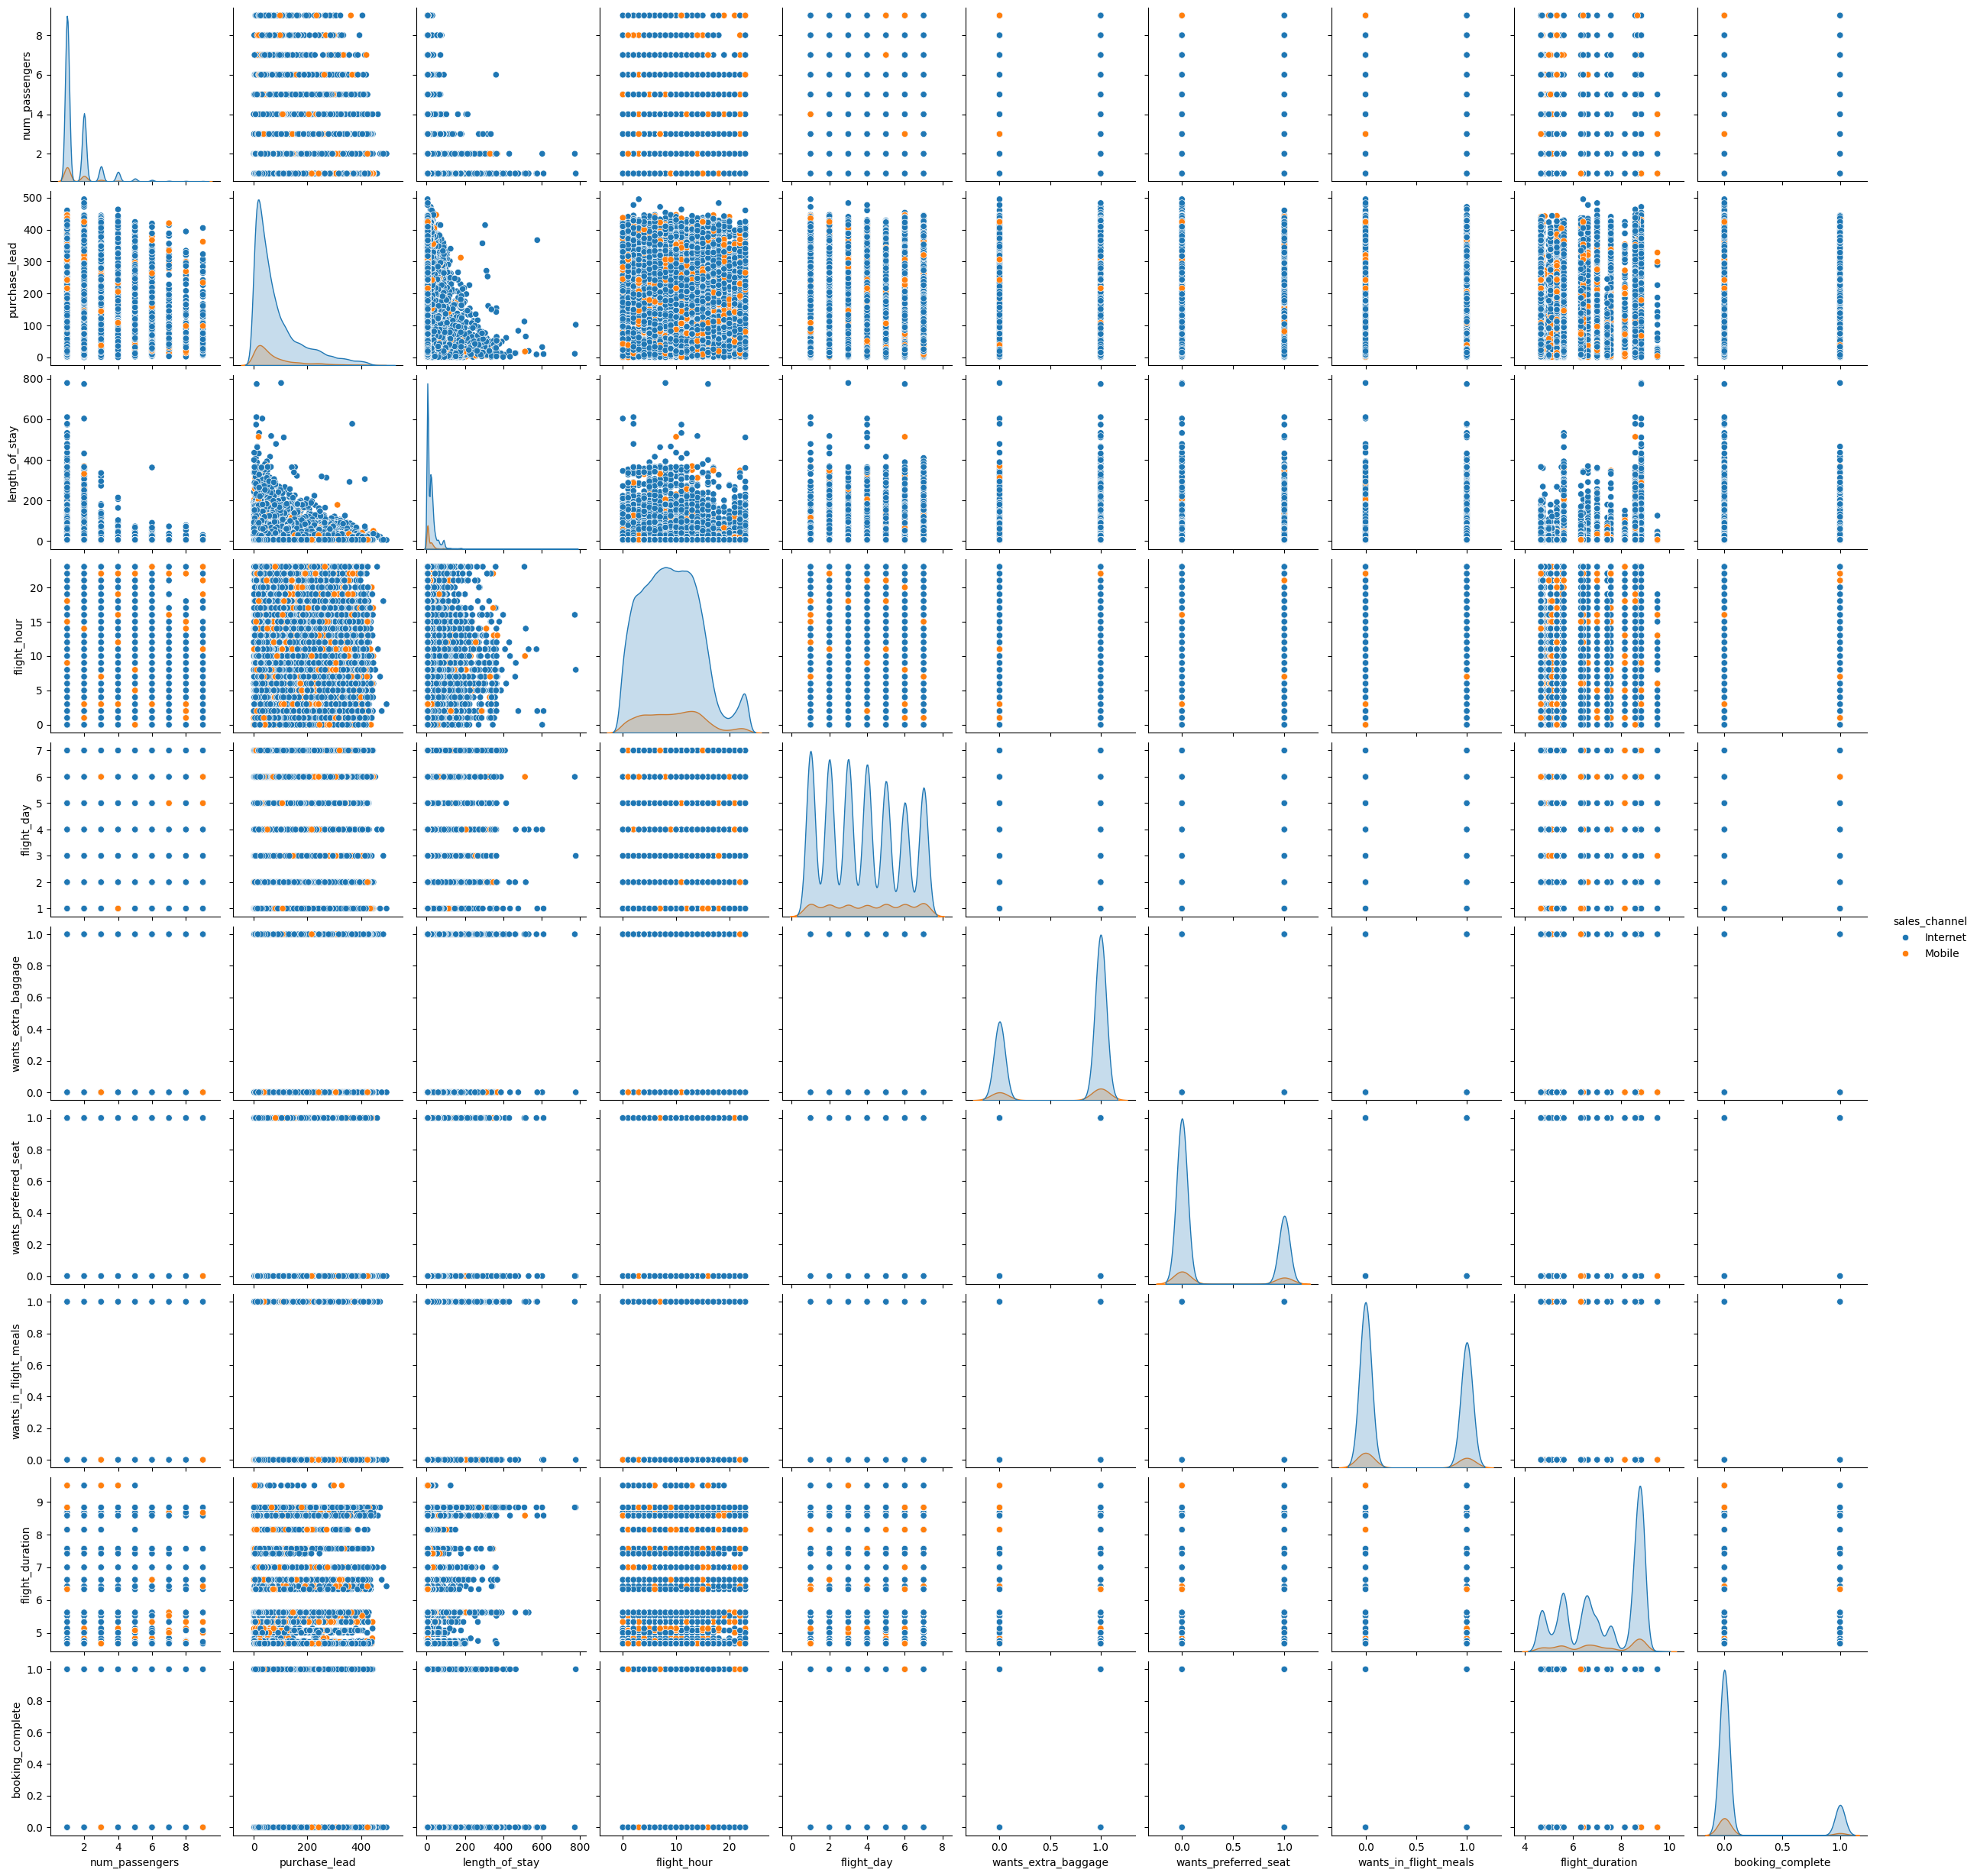

In [169]:
# Grafivo de la correlación entre las variables numéricas
plt.figure(figsize=(10, 6))
sns.pairplot(df_filtered, hue='sales_channel')